In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random, sqrt
from qiskit.quantum_info import Statevector, Operator

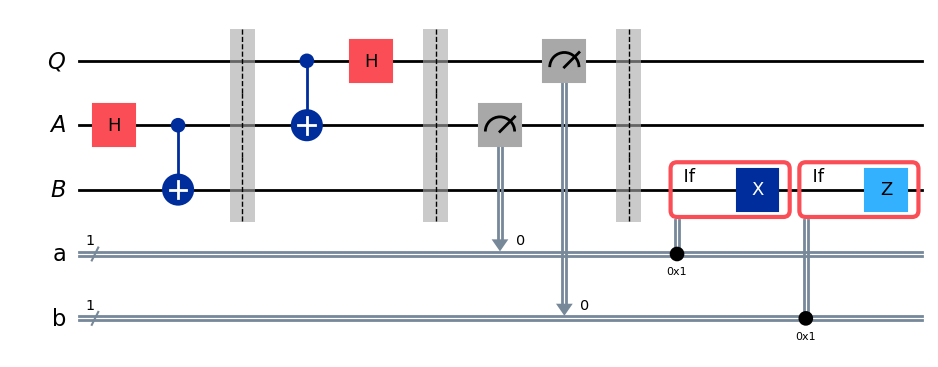

In [3]:
qubit = QuantumRegister(1, "Q")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")
a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")

protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# prepare ebit
protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier()

#Alice performs operations
protocol.cx(qubit, ebit0)
protocol.h(qubit)
protocol.barrier()

#Alice measures her qubits and sends the classical bits to Bob
protocol.measure(ebit0, a)
protocol.measure(qubit, b)
protocol.barrier()

# Bob uses classical bits to conditionally apply gates
with protocol.if_test((a, 1)):
    protocol.x(ebit1)
with protocol.if_test((b, 1)):
    protocol.z(ebit1)

display(protocol.draw(output='mpl', filename="teleportation_circuit.png"))

In [4]:
# randomly choose a unitary qubit gate

random_gate = UGate(
    theta = random.random() * 2 * pi,
    phi = random.random() * 2 * pi,
    lam = random.random() * 2 * pi,
)
random_gate_dg = random_gate.inverse()

display(array_to_latex(random_gate))
#display(random_gate_dg.to_matrix())

zero, one = Statevector.from_label("0"), Statevector.from_label("1")
plus, minus = Statevector.from_label("+"), Statevector.from_label("-")

psi_0 = zero.evolve(random_gate)
psi_0.draw("latex")

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [5]:
psi_1 = one.evolve(random_gate)
psi_1.draw("latex")


<IPython.core.display.Latex object>

In [6]:

psi_p = plus.evolve(random_gate)
psi_p.draw("latex")



<IPython.core.display.Latex object>

In [7]:
psi_m = minus.evolve(random_gate)
psi_m.draw("latex")

<IPython.core.display.Latex object>

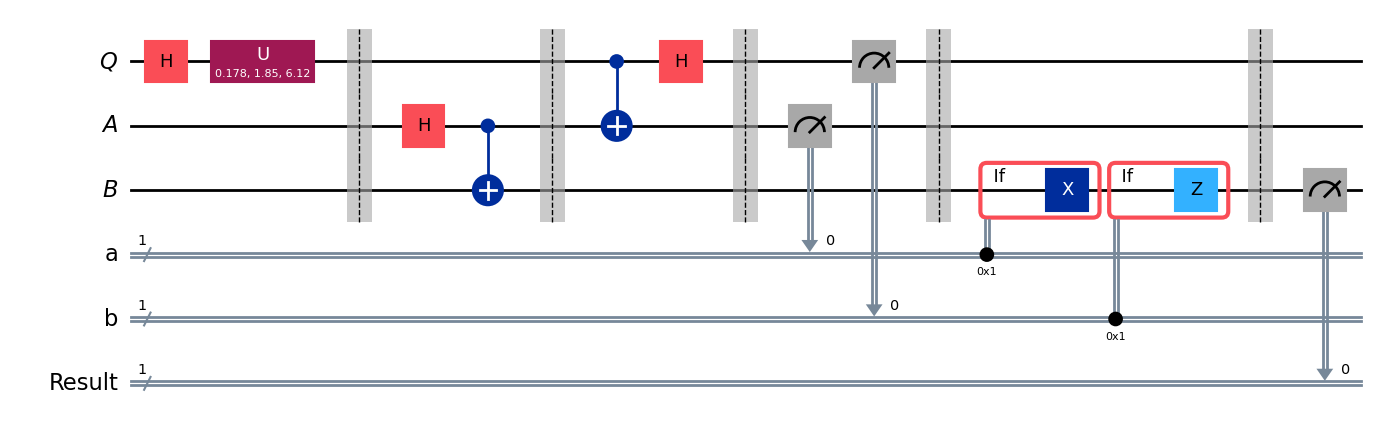

In [8]:
# Create a new circuit including the same bits and qubits used in the teleportation protocol

test = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Start with the randomly selected gate on Q
#test.x(qubit)
test.h(qubit)

test.append(random_gate, qubit)
test.barrier()

# Append the entire teleportation protocol from above

test = test.compose(protocol)
test.barrier()

# Apaply inverse of U to B and measure, should be 0

#test.append(random_gate.inverse(), ebit1)

result = ClassicalRegister(1, "Result")
test.add_register(result)
test.measure(ebit1, result)

display(test.draw(output='mpl', filename="teleportation_U_circuit.png"))

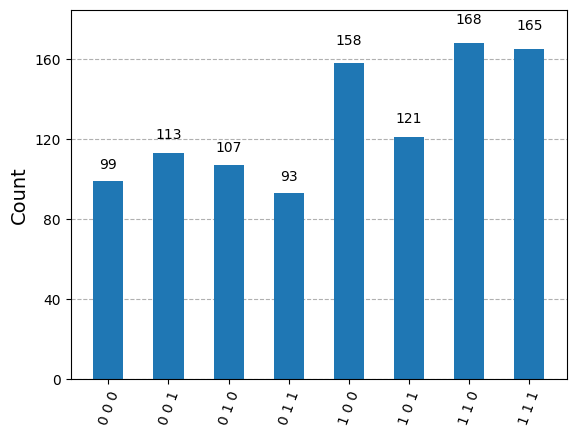

In [9]:
result = AerSimulator().run(test).result()
statistics = result.get_counts()
display(plot_histogram(statistics))